#**Real-Time Face Mask Detection Using Deep Learning and Convolutional Neural Networks**

#### **Abstract:**
This focuses on the development and implementation of a Convolutional Neural Network (CNN)-based system to classify whether a person is wearing a face mask or not. Given the critical importance of face mask compliance in public health and safety, the proposed solution aims to offer a robust, real-time classification model using deep learning techniques. The project investigates various CNN architectures and optimizes the model for high accuracy and efficiency in deployment. Furthermore, techniques such as data augmentation, transfer learning, and model fine-tuning are explored to enhance performance on real-world datasets, ensuring scalability and effectiveness in different environments.

#**Reading data from the kaggle**

In [ ]:
# prompt: read kaggle datasets download -d belsonraja/face-mask-dataset-with-and-without-mask

!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


#**Read data from the kaggle**

In [ ]:

!kaggle datasets download -d belsonraja/face-mask-dataset-with-and-without-mask


Dataset URL: https://www.kaggle.com/datasets/belsonraja/face-mask-dataset-with-and-without-mask
License(s): unknown
 89% 121M/137M [00:03<00:00, 26.8MB/s]
100% 137M/137M [00:04<00:00, 35.2MB/s]


#**Unziping the code**

In [ ]:
!unzip /content/face-mask-dataset-with-and-without-mask.zip


Archive:  /content/face-mask-dataset-with-and-without-mask.zip
  inflating: face_detector/deploy.prototxt  
  inflating: face_detector/res10_300x300_ssd_iter_140000.caffemodel  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1).jpeg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1).png  
  inflating: facemask-dataset/dataset/with_mask/with_mask (10).jpeg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (10).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (10).png  
  inflating: facemask-dataset/dataset/with_mask/with_mask (100).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1000).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1001).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1002).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_mask (1003).jpg  
  inflating: facemask-dataset/dataset/with_mask/with_ma

In [ ]:
#read /content/facemask-dataset/dataset/with_mask and /content/facemask-dataset/dataset/without_mask
import os

with_mask_dir = '/content/facemask-dataset/dataset/with_mask'
without_mask_dir = '/content/facemask-dataset/dataset/without_mask'

with_mask_files = os.listdir(with_mask_dir)
without_mask_files = os.listdir(without_mask_dir)


In [ ]:
print("Files in with_mask directory:")
for file in with_mask_files:
  print(file)

Files in with_mask directory:
with_mask (292).jpg
with_mask (866).jpg
with_mask (1312).jpg
with_mask (808).jpg
with_mask (974).jpg
with_mask (284).jpg
with_mask (78).jpg
with_mask (315).jpg
with_mask (1501).jpg
with_mask (1762).jpg
with_mask (1637).jpg
with_mask (971).jpg
with_mask (19).jpg
with_mask (1360).jpg
with_mask (130).jpg
with_mask (354).jpg
with_mask (1347).jpg
with_mask (1324).jpg
with_mask (1161).jpg
with_mask (436).jpg
with_mask (583).jpg
with_mask (1118).jpg
with_mask (192).jpg
with_mask (1318).jpg
with_mask (582).jpg
with_mask (452).jpg
with_mask (266).jpg
with_mask (172).jpg
with_mask (1713).jpg
with_mask (453).jpg
with_mask (265).jpg
with_mask (712).jpg
with_mask (437).jpg
with_mask (1469).jpg
with_mask (777).jpg
with_mask (656).jpg
with_mask (1773).jpg
with_mask (60).jpg
with_mask (1776).jpg
with_mask (132).jpg
with_mask (695).jpg
with_mask (1709).jpg
with_mask (456).jpg
with_mask (264).jpg
with_mask (356).jpg
with_mask (173).jpg
with_mask (1099).jpg
with_mask (175).j

In [ ]:
print("\nFiles in without_mask directory:")
for file in without_mask_files:
  print(file)


Files in without_mask directory:
without_mask (1050).jpg
without_mask (1224).jpg
without_mask (1660).jpg
without_mask (1133).jpg
without_mask (1209).jpg
without_mask (71).jpg
without_mask (1734).jpg
without_mask (49).jpg
without_mask (1216).jpg
without_mask (1027).jpg
without_mask (188).jpg
without_mask (432).jpg
without_mask (1818).jpg
without_mask (867).jpg
without_mask (446).jpg
without_mask (230).jpg
without_mask (255).jpg
without_mask (525).jpg
without_mask (766).jpg
without_mask (575).jpg
without_mask (335).jpg
without_mask (1054).jpg
without_mask (1523).jpg
without_mask (494).jpg
without_mask (334).jpg
without_mask (1211).jpg
without_mask (699).jpg
without_mask (149).jpg
without_mask (1420).jpg
without_mask (685).jpg
without_mask (1591).jpg
without_mask (1288).jpg
without_mask (697).jpg
without_mask (1489).jpg
without_mask (1275).jpg
without_mask (1031).jpg
without_mask (1138).jpg
without_mask (1816).jpg
without_mask (77).jpg
without_mask (1767).jpg
without_mask (1549).jpg
with

In [ ]:
len(with_mask_files)

1915

In [ ]:
len(without_mask_files)

1918

In [ ]:
#randomly get images from with_mask_files and without_mask_files and plot them

import matplotlib.pyplot as plt
import random
import cv2

#Choose a random number of images to display (e.g., 5)
num_images_to_display = 2

#Get a random sample of image filenames from each directory
random_with_mask_files = random.sample(with_mask_files, num_images_to_display)
random_without_mask_files = random.sample(without_mask_files, num_images_to_display)

In [ ]:
#Function to display images in a grid
def display_images(image_paths, title):
  plt.figure(figsize=(15, 5))
  plt.suptitle(title)
  for i, image_path in enumerate(image_paths):
    img = cv2.imread(os.path.join(with_mask_dir, image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.show()

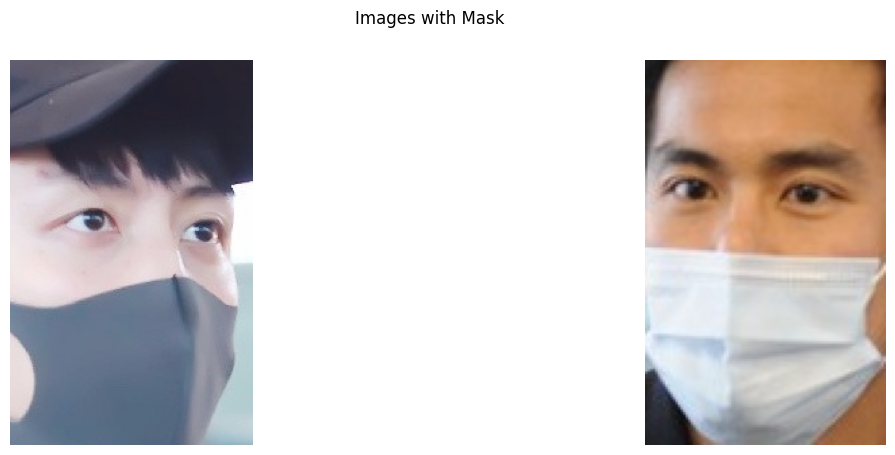

In [ ]:
# Display images with mask
display_images([os.path.join(with_mask_dir, filename) for filename in random_with_mask_files], "Images with Mask")

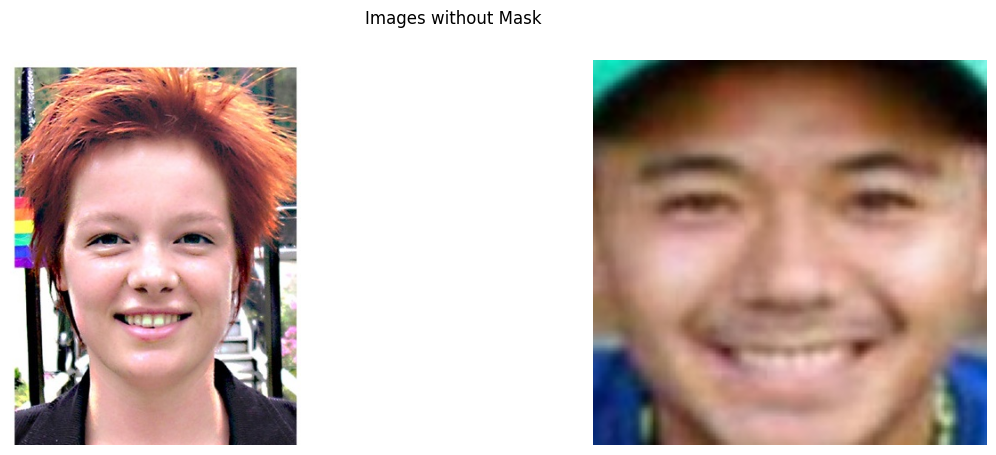

In [ ]:
# Display images without mask
display_images([os.path.join(without_mask_dir, filename) for filename in random_without_mask_files], "Images without Mask")


In [ ]:
# make a cnn model to ditinguish  btween
# with_mask_files
# without_mask_files image and test the accuracy

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define image dimensions
img_width, img_height = 150, 150

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    '/content/facemask-dataset/dataset',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/facemask-dataset/dataset',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


#**creating CNN model to predict the masked or non-masked faces**

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/96 ━━━━━━━━━━━━━━━━━━━━ 2:19 2s/step - accuracy: 0.6323 - loss: 0.7418

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7906 - loss: 0.4744 - val_accuracy: 0.9086 - val_loss: 0.2497
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9264 - loss: 0.2009 - val_accuracy: 0.9373 - val_loss: 0.1695
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9338 - loss: 0.1725 - val_accuracy: 0.9426 - val_loss: 0.1644
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9489 - loss: 0.1572 - val_accuracy: 0.9543 - val_loss: 0.1355
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9456 - loss: 0.1392 - val_accuracy: 0.9569 - val_loss: 0.1190
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9666 - loss: 0.1016 - val_accuracy: 0.9543 - val_loss: 0.1297
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9574 - loss: 0.1078 - val_accuracy: 0.9595 - val_loss: 0.1258
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9672 - loss: 0.1023 - val_accuracy: 0.9517 - val_loss: 0.

#**Accuracy of the model**

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print('Validation accuracy:', accuracy)

24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9452 - loss: 0.1631
Validation accuracy: 0.9386423230171204


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
def show_image(image_path):
    img = mpimg.imread(image_path)  # Load the image from the given path
    plt.imshow(img)                 # Display the image using matplotlib
    plt.axis('off')                 # Hide the axis
    plt.show()                      # Render the image

#**Prediction using the model on a new image**

In [21]:
#using above model i want to pass an images to know wehter it has mask or not

import numpy as np
from tensorflow.keras.preprocessing import image

def predict_mask(image_path):
  img = image.load_img(image_path, target_size=(img_width, img_height))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.

  prediction = model.predict(img_array)

  if prediction[0][0] > 0.5:
    print("The image likely does not have a mask.")
  else:
    print("The image likely has a mask.")

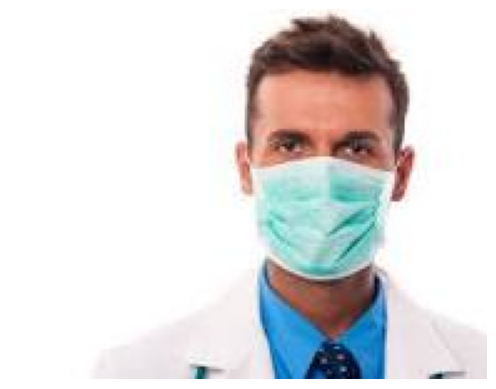

In [34]:
# Example usage
image_path = '/content/download.jpeg'  # Replace with the actual image path
show_image(image_path)


In [35]:
predict_mask(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The image likely has a mask.


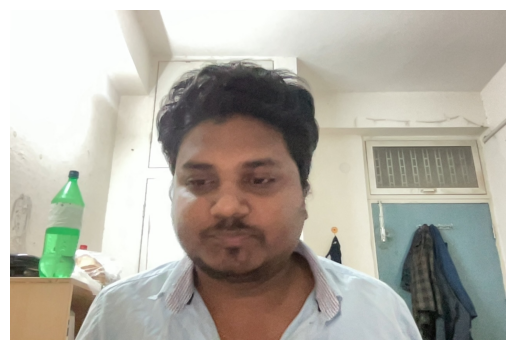

In [25]:
# Example usage
image_path = '/content/lp_image.jpeg'  # Replace with the actual image path
show_image(image_path)


In [26]:
predict_mask('/content/lp_image.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The image likely does not have a mask.


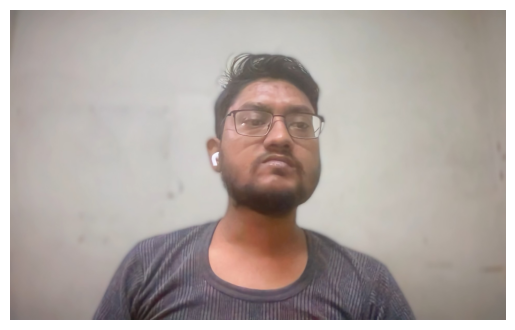

In [30]:
img_path='/content/81777C91-D815-4FE4-8557-4FC38519849D.jpeg'
show_image(img_path)

In [31]:
predict_mask(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The image likely does not have a mask.
